In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_week = pd.read_csv('week_approach_maskedID_timeseries.csv')
df_week.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [3]:
df_week.isnull().values.any()

False

In [4]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

## Analysis on nr.session

In [5]:
print(df_week['nr. sessions'].sum())
print(df_week['nr. sessions.1'].sum())
print(df_week['nr. sessions.2'].sum())

248628.0
248580.0
248690.0


In [6]:
df_ath_ses = pd.DataFrame()
df_ath_ses['Day0'] = df_week.groupby('Athlete ID')['nr. sessions'].sum()
df_ath_ses['Day1'] = df_week.groupby('Athlete ID')['nr. sessions.1'].sum()
df_ath_ses['Day2'] = df_week.groupby('Athlete ID')['nr. sessions.2'].sum()

In [7]:
df_ath_ses.head()

,Day0,Day1,Day2
Athlete ID,,,
0,1264.0,1278.0,1257.0
1,2774.0,2771.0,2704.0
2,7175.0,7175.0,7133.0
3,1956.0,1987.0,2015.0
4,4372.0,4318.0,4281.0


In [8]:
df_ath_ses.reset_index(inplace=True)

In [9]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2
0,0,1264.0,1278.0,1257.0
1,1,2774.0,2771.0,2704.0
2,2,7175.0,7175.0,7133.0
3,3,1956.0,1987.0,2015.0
4,4,4372.0,4318.0,4281.0


In [10]:
df_ath_ses['Total'] = df_ath_ses.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [11]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,1264.0,1278.0,1257.0,3799.0
1,1,2774.0,2771.0,2704.0,8249.0
2,2,7175.0,7175.0,7133.0,21483.0
3,3,1956.0,1987.0,2015.0,5958.0
4,4,4372.0,4318.0,4281.0,12971.0


The dataframe above shows total number of sessions each Athlete had for their training.

<AxesSubplot:>

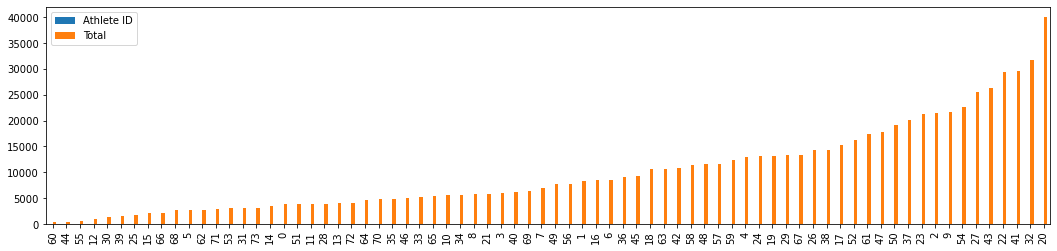

In [12]:
df_ath_ses[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))

From the plot above, we can clearly see that Athleted ID 60 did least number of sessions  whereas Athlete ID 20 did maximum number of sessions.

## Analysis on nr. rest days 

In [13]:
df_ath_rest = pd.DataFrame()
df_ath_rest['Day0'] = df_week.groupby('Athlete ID')['nr. rest days'].sum()
df_ath_rest['Day1'] = df_week.groupby('Athlete ID')['nr. rest days.1'].sum()
df_ath_rest['Day2'] = df_week.groupby('Athlete ID')['nr. rest days.2'].sum()

In [14]:
df_ath_rest.head()

,Day0,Day1,Day2
Athlete ID,,,
0,958.0,938.0,955.0
1,1072.0,1093.0,1145.0
2,2280.0,2281.0,2324.0
3,600.0,580.0,561.0
4,1055.0,1091.0,1125.0


In [15]:
df_ath_rest.reset_index(inplace=True)

In [16]:
df_ath_rest.head()

,Athlete ID,Day0,Day1,Day2
0,0,958.0,938.0,955.0
1,1,1072.0,1093.0,1145.0
2,2,2280.0,2281.0,2324.0
3,3,600.0,580.0,561.0
4,4,1055.0,1091.0,1125.0


In [17]:
df_ath_rest['Total'] = df_ath_rest.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [18]:
df_ath_rest.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,958.0,938.0,955.0,2851.0
1,1,1072.0,1093.0,1145.0,3310.0
2,2,2280.0,2281.0,2324.0,6885.0
3,3,600.0,580.0,561.0,1741.0
4,4,1055.0,1091.0,1125.0,3271.0


The dataframe above shows the total number of rest days each Athlete had for their training.

<AxesSubplot:>

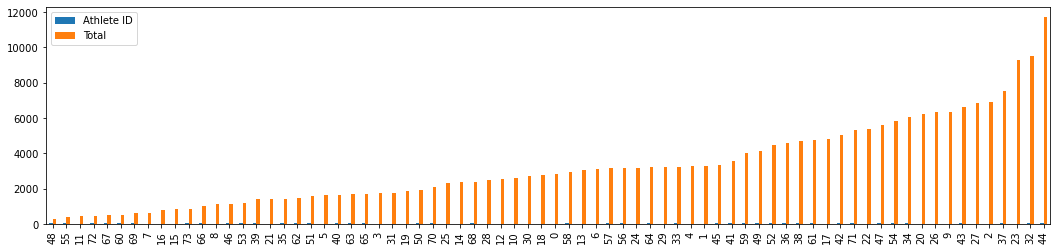

In [19]:
df_ath_rest[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))

## Analysis on  nr. tough sessions (effort in Z5, T1 or T2)   

In [20]:
df_ath_tses = pd.DataFrame()
df_ath_tses['Day0'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2)'].sum()
df_ath_tses['Day1'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2).1'].sum()
df_ath_tses['Day2'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2).2'].sum()

In [21]:
df_ath_tses.head()

,Day0,Day1,Day2
Athlete ID,,,
0,154.0,161.0,157.0
1,299.0,297.0,285.0
2,815.0,825.0,841.0
3,720.0,716.0,727.0
4,725.0,704.0,694.0


In [22]:
df_ath_tses.reset_index(inplace=True)

In [23]:
df_ath_tses.head()

,Athlete ID,Day0,Day1,Day2
0,0,154.0,161.0,157.0
1,1,299.0,297.0,285.0
2,2,815.0,825.0,841.0
3,3,720.0,716.0,727.0
4,4,725.0,704.0,694.0


In [24]:
df_ath_tses['Total'] = df_ath_tses.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [25]:
df_ath_tses.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,154.0,161.0,157.0,472.0
1,1,299.0,297.0,285.0,881.0
2,2,815.0,825.0,841.0,2481.0
3,3,720.0,716.0,727.0,2163.0
4,4,725.0,704.0,694.0,2123.0


The dataframe above shows the total number of tough sessions each Athlete had for their training.

<AxesSubplot:>

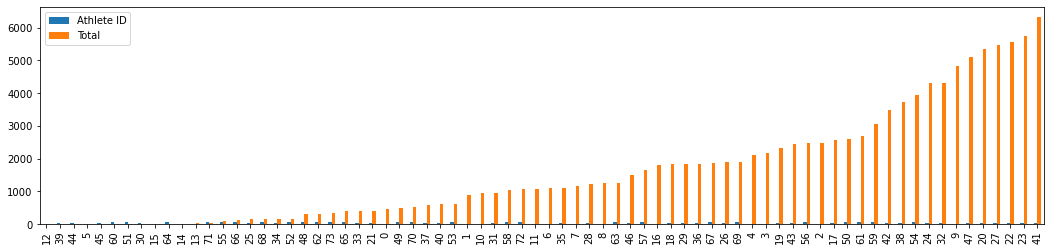

In [26]:
df_ath_tses[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))

0    42223
1      575
Name: injury, dtype: int64


<AxesSubplot:xlabel='injury', ylabel='count'>

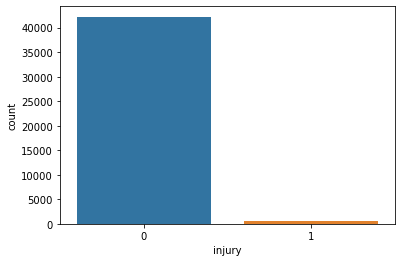

In [27]:
print(df_week['injury'].value_counts())
sns.countplot(df_week['injury'])

In our entire dataset, there are a total of 42223 times an athlete didn't got injured, and 575 times an athlete got injured.

## Analysis on injury per athlete

In [28]:
df_ath_injury = pd.DataFrame()
df_ath_injury['Number of injury per Athlete'] = df_week.groupby('Athlete ID')['injury'].sum()

In [29]:
df_ath_injury.head()

,Number of injury per Athlete
Athlete ID,
0,7
1,2
2,4
3,3
4,7


In [30]:
df_ath_injury.describe()

,Number of injury per Athlete
count,74.000000
mean,7.770270
std,8.281928
min,0.000000
25%,2.000000
50%,5.000000
75%,11.500000
max,35.000000


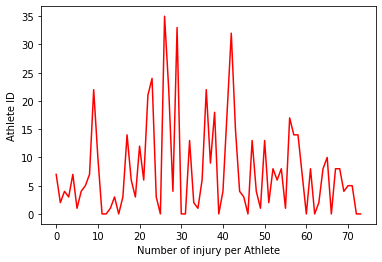

In [31]:
plt.plot(df_ath_injury, color = 'red')
# plt.title('Number of injury per Athlete')
plt.ylabel('Athlete ID')
plt.xlabel('Number of injury per Athlete')
plt.show()